## Societal Acceptance of the LGBTQ+ Community: A Demographic and Attitudinal Analysis
This research project investigates the relationships between demographic characteristics and attitudes toward the LGBTQ+ community through survey analysis. By examining how factors such as age, education level, religious affiliation, political orientation, and frequency of interaction with LGBTQ+ individuals correlate with acceptance and understanding, this study aims to identify patterns that can inform educational initiatives and policy development.

## Research Question
How do demographic factors (age, education, religion, and political views) correlate with attitudes, understanding, and acceptance of the LGBTQ+ community?

## Hypothesis
Higher levels of education, younger age groups, and increased frequency of interaction with LGBTQ+ individuals will positively correlate with greater acceptance and understanding of LGBTQ+ issues.

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor

print("Packages imported successfully")

Packages imported successfully


## Data Import

In [2]:
data = pd.read_excel("/Users/mari/Desktop/Github/societalacceptanceoflgbtqcommunity/societal_acceptance.xlsx")
df = pd.DataFrame(data)
print(df.head())

                                  #  \
0  ztfw5stwq4m3xtztfyewlpxbl6frb80s   
1  rzna89fakp14yfqrwyd7vdrzna89fs0i   
2  66rxhe42rn2tv966rxhtghua7iyc0li3   
3  f4xo4trvwusznv04fu8f4x1nd9hmpiqa   
4  kjesldgd5gvzfwdg54u8r6kjeslm7i43   

  How old are you? Please see the appropriate age range.  \
0                                              45-54       
1                                              35-44       
2                                              25-34       
3                                              25-34       
4                                              25-34       

  How would you describe your ethnicity?    How do you identify?  \
0              Black or African-American                  Female   
1                                  Asian                    Male   
2                                  White  Prefer not to disclose   
3                                  White                    Male   
4              Black or African-American                    Male

## Data Preprocessing

In [3]:
# Rename the column headers
df.rename(columns = {'How old are you? Please see the appropriate age range.': 'Age Range', 
                     'How would you describe your ethnicity?': 'Ethnicity', 
                     'How would you describe your sexual orientation?': 'Sexual Orientation',
                     'What is the highest level of school you have completed or the highest degree you have received?': 'Education Level', 
                     'Do you identify with any of the following religions?': 'Religious Beliefs', 
                     'How would you describe your political viewpoints?': 'Political Viewpoint', 
                     'Do you identify as a member of the LGBTQ+ community?': 'LGBTQ?', 
                     'How frequently do you interact with members of the LGBTQ+ community?': 'Frequency of LGBTQ interaction', 
                     'On a scale of 1-10, how would you rate your overall understanding of LGBTQ+ issues?': 'Overall Understanding of LGBTQ Issues',  
                     'What is your primary source of information about LGBTQ+ issues? (Please choose the best option from this list)': 'Primary Source of LGBTQ Info', 
                     'On a scale of 1-10, how important do you believe it is to educate the public about LGBTQ+ issues?': 'Public Education of LGBTQ Issues Rating', 
                     'On a scale of 1-10, how would you rate your overall acceptance of the LGBTQ+ community?': 'Overall Acceptance Rating', 
                     'Do you believe that LGBTQ+ individuals should have the same rights as non-LGBTQ+ individuals?': 'Equality Rating',  
                     'Have your views on the LGBTQ+ community changed over the last few years?': 'Views Have Changed',
                     'How would you react if a friend or family member came out as LGBTQ+?': 'Reaction of Coming Out', 
                     'Do you know anyone personally who identifies as LGBTQ+?': 'Knows Someone Who Is LGBTQ'}, inplace = True) 

In [4]:
# Check only the columns that have Na/NaN values in them (verification)
null_rows = df[df.isna().any(axis = 1)]
display(null_rows)

,#,Age Range,Ethnicity,How do you identify?,Sexual Orientation,Other,Education Level,Religious Beliefs,Other.1,Political Viewpoint,LGBTQ?,Knows Someone Who Is LGBTQ,Frequency of LGBTQ interaction,Overall Understanding of LGBTQ Issues,Primary Source of LGBTQ Info,Public Education of LGBTQ Issues Rating,Overall Acceptance Rating,Equality Rating,Views Have Changed,Reaction of Coming Out
0,ztfw5stwq4m3xtztfyewlpxbl6frb80s,45-54,Black or African-American,Female,Straight,NaN,Some college but no degree,Christianity,NaN,Moderate,0,1,Daily,6,Personal experiences or encounters,8,10,1,1,I would support and accept them unconditionally.
1,rzna89fakp14yfqrwyd7vdrzna89fs0i,35-44,Asian,Male,Straight,NaN,Bachelor degree,Catholicism,NaN,Slightly liberal,1,1,Daily,6,Personal experiences or encounters,9,7,1,1,I would support and accept them unconditionally.
2,66rxhe42rn2tv966rxhtghua7iyc0li3,25-34,White,Prefer not to disclose,Straight,NaN,Bachelor degree,No religion,NaN,Slightly liberal,0,1,Monthly,6,Personal experiences or encounters,6,8,1,0,I would express my love and continue to treat ...
3,f4xo4trvwusznv04fu8f4x1nd9hmpiqa,25-34,White,Male,Straight,NaN,Some college but no degree,No religion,NaN,Slightly liberal,0,1,Weekly,8,Personal experiences or encounters,7,8,1,0,I would express my love and continue to treat ...
4,kjesldgd5gvzfwdg54u8r6kjeslm7i43,25-34,Black or African-American,Male,Straight,NaN,Some college but no degree,Christianity,NaN,Very liberal,0,1,Daily,7,Friends or family members,9,10,1,0,I would support and accept them unconditionally.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,vhlff3u1ghlt5pdkcvhlfbyn8vrwsyy8,25-34,Black or African-American,Female,Bisexual,NaN,Bachelor degree,No religion,NaN,Very liberal,1,1,Daily,7,Personal experiences or encounters,8,10,1,1,I would support and accept them unconditionally.
173,unz902dg8gnwjkgdmu2goeunz902tg0r,25-34,Black or African-American,Female,Straight,NaN,Some college but no degree,No religion,NaN,Very liberal,0,1,Daily,9,Friends or family members,10,10,1,0,I would support and accept them unconditionally.
174,3a4vwosqcb84qsjq8am3a4vwkk6qfu8u,45-54,Black or African-American,Male,Gay,NaN,"Graduate degree (ex. Masters, PhD, M.D)",Christianity,NaN,Moderate,1,1,Daily,9,Non-profit LGBTQ+ organizations,10,10,1,1,I would support and accept them unconditionally.
175,ix3vpthiiaxlfaqy0ix3vpthxnlj795c,18-24,Black or African-American,Transgender,Straight,NaN,Bachelor degree,Christianity,NaN,Slightly liberal,1,1,Daily,9,Personal experiences or encounters,10,10,1,0,I would express my love and continue to treat ...


In [5]:
# Remove #, two 'other' columns from the dataframe
df.drop(['#', 'Other', 'Other.1'], axis = 1, inplace = True)

In [6]:
# Replace Na/NaN values in the approriate columns
df['Sexual Orientation'] = df['Sexual Orientation'].replace(np.nan, 'Queer')
df['Religious Beliefs'] = df['Religious Beliefs'].replace(np.nan, 'Other')

In [7]:
# Check if Na/NaN values were updated in the dataframe
df.isnull().sum()

Age Range                                  0
Ethnicity                                  0
How do you identify?                       0
Sexual Orientation                         0
Education Level                            0
Religious Beliefs                          0
Political Viewpoint                        0
LGBTQ?                                     0
Knows Someone Who Is LGBTQ                 0
Frequency of LGBTQ interaction             0
Overall Understanding of LGBTQ Issues      0
Primary Source of LGBTQ Info               0
Public Education of LGBTQ Issues Rating    0
Overall Acceptance Rating                  0
Equality Rating                            0
Views Have Changed                         0
Reaction of Coming Out                     0
dtype: int64

In [8]:
# Replace 0, 1 with no, yes in the approriate columns
cols_to_replace = ['LGBTQ?', 'Knows Someone Who Is LGBTQ', 'Equality Rating', 'Views Have Changed']
replace_vals = {0: 'No', 1:'Yes'}
df[cols_to_replace] = df[cols_to_replace].replace(replace_vals)

In [9]:
df.head()

,Age Range,Ethnicity,How do you identify?,Sexual Orientation,Education Level,Religious Beliefs,Political Viewpoint,LGBTQ?,Knows Someone Who Is LGBTQ,Frequency of LGBTQ interaction,Overall Understanding of LGBTQ Issues,Primary Source of LGBTQ Info,Public Education of LGBTQ Issues Rating,Overall Acceptance Rating,Equality Rating,Views Have Changed,Reaction of Coming Out
0,45-54,Black or African-American,Female,Straight,Some college but no degree,Christianity,Moderate,No,Yes,Daily,6,Personal experiences or encounters,8,10,Yes,Yes,I would support and accept them unconditionally.
1,35-44,Asian,Male,Straight,Bachelor degree,Catholicism,Slightly liberal,Yes,Yes,Daily,6,Personal experiences or encounters,9,7,Yes,Yes,I would support and accept them unconditionally.
2,25-34,White,Prefer not to disclose,Straight,Bachelor degree,No religion,Slightly liberal,No,Yes,Monthly,6,Personal experiences or encounters,6,8,Yes,No,I would express my love and continue to treat ...
3,25-34,White,Male,Straight,Some college but no degree,No religion,Slightly liberal,No,Yes,Weekly,8,Personal experiences or encounters,7,8,Yes,No,I would express my love and continue to treat ...
4,25-34,Black or African-American,Male,Straight,Some college but no degree,Christianity,Very liberal,No,Yes,Daily,7,Friends or family members,9,10,Yes,No,I would support and accept them unconditionally.


## EDA - Exploratory Data Analysis

In [10]:
# Display the size of the dataframe
df.shape

(177, 17)

In [11]:
# Examine the column names and data types in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 17 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Age Range                                177 non-null    object
 1   Ethnicity                                177 non-null    object
 2   How do you identify?                     177 non-null    object
 3   Sexual Orientation                       177 non-null    object
 4   Education Level                          177 non-null    object
 5   Religious Beliefs                        177 non-null    object
 6   Political Viewpoint                      177 non-null    object
 7   LGBTQ?                                   177 non-null    object
 8   Knows Someone Who Is LGBTQ               177 non-null    object
 9   Frequency of LGBTQ interaction           177 non-null    object
 10  Overall Understanding of LGBTQ Issues    177 non-null    int64

In [12]:
# Describe the dataset to get a summary of statistics
df.describe()

,Overall Understanding of LGBTQ Issues,Public Education of LGBTQ Issues Rating,Overall Acceptance Rating
count,177.000000,177.000000,177.000000
mean,7.559322,8.096045,8.423729
std,1.979479,2.492451,2.317449
min,1.000000,1.000000,1.000000
25%,7.000000,7.000000,8.000000
50%,8.000000,9.000000,10.000000
75%,9.000000,10.000000,10.000000
max,10.000000,10.000000,10.000000


In [13]:
# Check the statistics for the age, ethnicity, education, religion, political beliefs columns
age_desc = df['Age Range'].describe()
eth_desc = df['Ethnicity'].describe()
edu_desc = df['Education Level'].describe()
rel_desc = df['Religious Beliefs'].describe()
political_desc = df['Political Viewpoint'].describe()
print(age_desc, eth_desc, edu_desc, rel_desc, political_desc, sep='\n\n\n\n\n')

count       177
unique        6
top       25-34
freq         75
Name: Age Range, dtype: object




count       177
unique        4
top       White
freq         93
Name: Ethnicity, dtype: object




count                 177
unique                  7
top       Bachelor degree
freq                   75
Name: Education Level, dtype: object




count             177
unique              8
top       No religion
freq               74
Name: Religious Beliefs, dtype: object




count              177
unique               6
top       Very liberal
freq                69
Name: Political Viewpoint, dtype: object


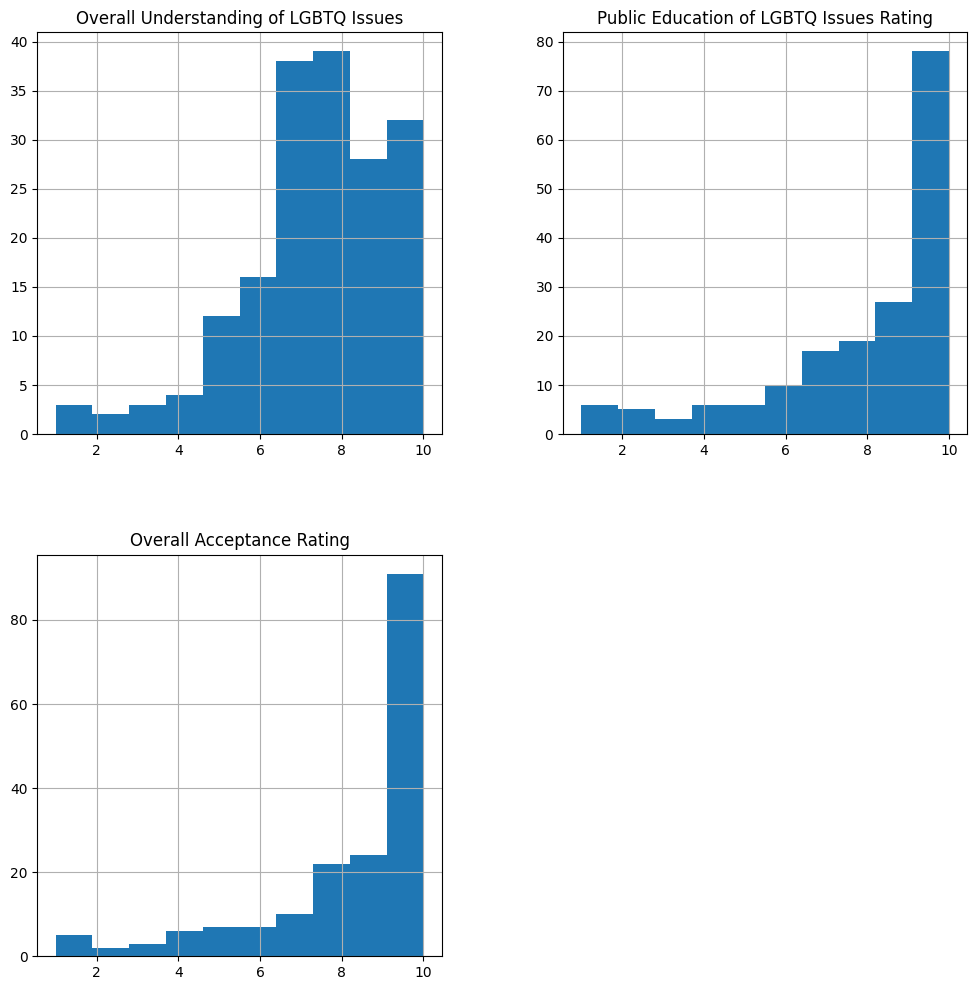

In [14]:
# Quick EDA of numerical columns
df.hist(figsize=(12,12))
plt.show()

## Data Analysis Questions

### Education vs. Acceptance:
Is there a positive correlation between level of education and acceptance of the LGBTQ+ community?

Acceptance by education (ordinal):
                   count      mean       std
Education Ordinal                           
1.0                   21  6.952381  3.485343
2.0                   39  8.871795  1.719539
3.0                    7  8.000000  3.605551
4.0                   75  8.600000  1.910144
6.0                   34  8.500000  2.364510

Pearson r = 0.100, p = 1.846e-01
Spearman rho = 0.065, p = 3.903e-01


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


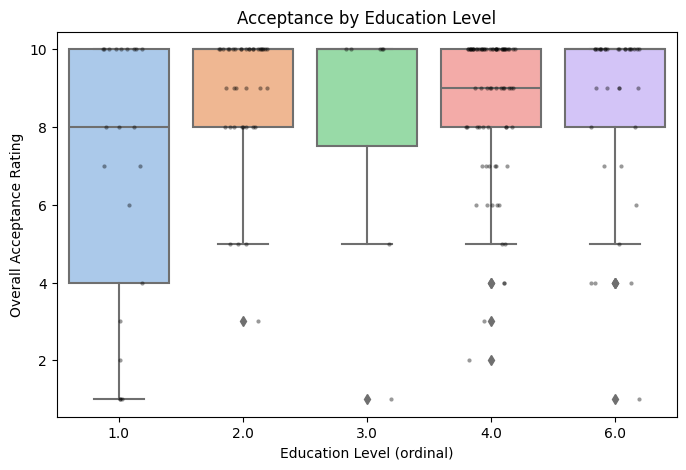

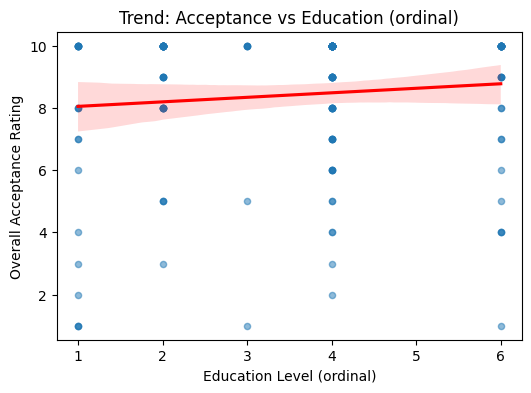

In [15]:
# Education vs Acceptance analysis

import scipy.stats as stats

# Prepare columns
edu_col = 'Education Level'
acc_col = 'Overall Acceptance Rating'

# Clean and coerce acceptance to numeric
df_clean = df[[edu_col, acc_col]].copy()
df_clean[acc_col] = pd.to_numeric(df_clean[acc_col], errors='coerce')
df_clean = df_clean.dropna(subset=[edu_col, acc_col])

# Map education to an ordinal numeric scale with simple keyword rules
def edu_to_ord(x):
    s = str(x).lower()
    if 'doctor' in s or 'phd' in s or 'doctoral' in s: return 6
    if 'master' in s or 'm.' in s: return 5
    if 'bachelor' in s or 'ba' in s or 'bs' in s: return 4
    if 'associate' in s: return 3
    if 'some' in s and 'college' in s: return 2
    if 'high' in s or 'secondary' in s: return 1
    if 'less' in s or 'no' in s or 'none' in s: return 0
    return np.nan

df_clean['Education Ordinal'] = df_clean[edu_col].map(edu_to_ord)
df_clean = df_clean.dropna(subset=['Education Ordinal'])

# Summary: group means and counts
grouped = df_clean.groupby('Education Ordinal')[acc_col].agg(['count', 'mean', 'std']).sort_index()
print("Acceptance by education (ordinal):")
print(grouped)

# Correlation tests
pearson_r, pearson_p = stats.pearsonr(df_clean['Education Ordinal'], df_clean[acc_col])
spearman_rho, spearman_p = stats.spearmanr(df_clean['Education Ordinal'], df_clean[acc_col])
print(f"\nPearson r = {pearson_r:.3f}, p = {pearson_p:.3e}")
print(f"Spearman rho = {spearman_rho:.3f}, p = {spearman_p:.3e}")

# Visualize: boxplot of acceptance by education ordinal + jittered points
plt.figure(figsize=(8,5))
sns.boxplot(x='Education Ordinal', y=acc_col, data=df_clean, palette='pastel')
sns.stripplot(x='Education Ordinal', y=acc_col, data=df_clean, color='k', alpha=0.4, jitter=0.2, size=3)
plt.xlabel('Education Level (ordinal)')
plt.ylabel('Overall Acceptance Rating')
plt.title('Acceptance by Education Level')
plt.show()

# Optional: linear trend (regression) on the ordinal scale
plt.figure(figsize=(6,4))
sns.regplot(x='Education Ordinal', y=acc_col, data=df_clean, scatter_kws={'s':20, 'alpha':0.5}, line_kws={'color':'red'})
plt.xlabel('Education Level (ordinal)')
plt.ylabel('Overall Acceptance Rating')
plt.title('Trend: Acceptance vs Education (ordinal)')
plt.show()

### Age vs. Understanding:
Do younger age groups demonstrate higher levels of understanding and acceptance of LGBTQ+ issues?

### Interaction Frequency vs. Attitudes:
Does greater frequency of interaction with LGBTQ+ individuals predict higher understanding and acceptance scores?


Summary for Overall Understanding of LGBTQ Issues by frequency:
                                 count      mean       std
Frequency of LGBTQ interaction                           
Never                               4  2.500000  2.380476
Rarely                             11  5.363636  1.501514
Monthly                             9  6.888889  2.315407
Weekly                             41  7.414634  1.774480
Daily                              97  8.298969  1.400632

Summary for Overall Acceptance Rating by frequency:
                                 count      mean       std
Frequency of LGBTQ interaction                           
Never                               4  2.250000  2.500000
Rarely                             11  4.818182  3.027150
Monthly                             9  7.444444  2.068279
Weekly                             41  8.390244  2.035658
Daily                              97  9.288660  1.353689

--- Overall Understanding of LGBTQ Issues ---
ANOVA F = 17.022, p =

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

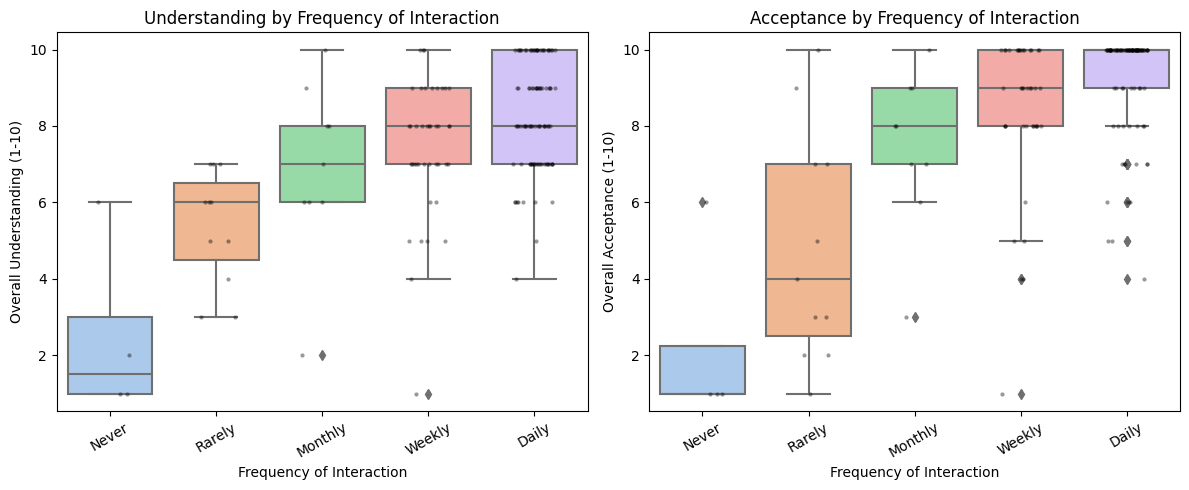

In [16]:
from scipy import stats

# Frequency of interaction vs understanding and acceptance (cell to add at index 25)

# Columns (use existing variables where available)
freq_col = 'Frequency of LGBTQ interaction'
under_col = 'Overall Understanding of LGBTQ Issues'
acc_col = 'Overall Acceptance Rating'   # acc_col already defined in the notebook

# Copy relevant data and drop missing
df_freq = df[[freq_col, under_col, acc_col]].copy().dropna()

# Standardize category text
df_freq[freq_col] = df_freq[freq_col].str.strip().str.title()

# Define an ordinal ordering for frequency (adjust if your categories differ)
ordered_freq = ['Never', 'Rarely', 'Monthly', 'Weekly', 'Daily']
ord_map = {k: i for i, k in enumerate(ordered_freq, start=1)}
df_freq['Freq Ordinal'] = df_freq[freq_col].map(ord_map)

# Group summary stats
for col in [under_col, acc_col]:
    grp = df_freq.groupby(freq_col)[col].agg(['count', 'mean', 'std']).loc[ordered_freq].dropna(how='all')
    print(f"\nSummary for {col} by frequency:\n", grp)

# ANOVA (parametric) and Kruskal-Wallis (nonparametric) across groups

def stats_across_groups(metric):
    groups = [grp[metric].values for name, grp in df_freq.groupby(freq_col) if len(grp) > 0]
    group_names = [name for name, grp in df_freq.groupby(freq_col) if len(grp) > 0]
    print(f"\n--- {metric} ---")
    # ANOVA (only if >=2 groups with >1 sample)
    try:
        if len(groups) >= 2 and all(len(g) > 1 for g in groups):
            f_stat, p_anova = stats.f_oneway(*groups)
            # compute eta-squared
            all_vals = df_freq[metric].values
            overall_mean = all_vals.mean()
            ss_between = sum(len(g) * (g.mean() - overall_mean) ** 2 for g in groups)
            ss_total = ((all_vals - overall_mean) ** 2).sum()
            eta_sq = ss_between / ss_total if ss_total > 0 else np.nan
            print(f"ANOVA F = {f_stat:.3f}, p = {p_anova:.3e}, eta^2 = {eta_sq:.3f}")
        else:
            print("ANOVA skipped (not enough samples per group).")
    except Exception as e:
        print("ANOVA error:", e)

    # Kruskal-Wallis
    try:
        if len(groups) >= 2:
            h_stat, p_kw = stats.kruskal(*groups)
            print(f"Kruskal-Wallis H = {h_stat:.3f}, p = {p_kw:.3e}")
        else:
            print("Kruskal-Wallis skipped (not enough groups).")
    except Exception as e:
        print("Kruskal-Wallis error:", e)

stats_across_groups(under_col)
stats_across_groups(acc_col)

# Spearman correlation using the ordinal mapping (tests monotonic trend)
for col in [under_col, acc_col]:
    valid = df_freq.dropna(subset=['Freq Ordinal', col])
    if len(valid) > 2:
        rho, p = stats.spearmanr(valid['Freq Ordinal'], valid[col])
        print(f"\nSpearman correlation between frequency (ordinal) and {col}: rho = {rho:.3f}, p = {p:.3e}")
    else:
        print(f"\nNot enough data for Spearman correlation for {col}.")

# Visualizations: ordered boxplots
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(x=freq_col, y=under_col, data=df_freq, order=ordered_freq, palette='pastel')
sns.stripplot(x=freq_col, y=under_col, data=df_freq, order=ordered_freq, color='k', size=3, alpha=0.4, jitter=0.2)
plt.title('Understanding by Frequency of Interaction')
plt.xlabel('Frequency of Interaction')
plt.ylabel('Overall Understanding (1-10)')
plt.xticks(rotation=30)

plt.subplot(1,2,2)
sns.boxplot(x=freq_col, y=acc_col, data=df_freq, order=ordered_freq, palette='pastel')
sns.stripplot(x=freq_col, y=acc_col, data=df_freq, order=ordered_freq, color='k', size=3, alpha=0.4, jitter=0.2)
plt.title('Acceptance by Frequency of Interaction')
plt.xlabel('Frequency of Interaction')
plt.ylabel('Overall Acceptance (1-10)')
plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

### Religion and Political Viewpoints vs. Acceptance:
How do religious affiliation and political viewpoints relate to acceptance and perceived importance of LGBTQ+ education?

## Data Science

### Correlation Analysis

### ANOVA

### Multiple Linear Regression

### Cluster Analysis